In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, plot_roc_curve, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.float_format', lambda x: '%.5f' % x)


In [2]:
import utils

In [3]:
data = pd.read_csv('data/training_set_features.csv')
labels = pd.read_csv('data/training_set_labels.csv')

In [4]:
# The features in this dataset
# You are provided a dataset with 36 columns. The first column respondent_id is a unique and random identifier. The remaining 35 features are described below.

# For all binary variables: 0 = No; 1 = Yes.

# h1n1_concern - Level of concern about the H1N1 flu.
# 0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.
# h1n1_knowledge - Level of knowledge about H1N1 flu.
# 0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.
# behavioral_antiviral_meds - Has taken antiviral medications. (binary)
# behavioral_avoidance - Has avoided close contact with others with flu-like symptoms. (binary)
# behavioral_face_mask - Has bought a face mask. (binary)
# behavioral_wash_hands - Has frequently washed hands or used hand sanitizer. (binary)
# behavioral_large_gatherings - Has reduced time at large gatherings. (binary)
# behavioral_outside_home - Has reduced contact with people outside of own household. (binary)
# behavioral_touch_face - Has avoided touching eyes, nose, or mouth. (binary)
# doctor_recc_h1n1 - H1N1 flu vaccine was recommended by doctor. (binary)
# doctor_recc_seasonal - Seasonal flu vaccine was recommended by doctor. (binary)
# chronic_med_condition - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)
# child_under_6_months - Has regular close contact with a child under the age of six months. (binary)
# health_worker - Is a healthcare worker. (binary)
# health_insurance - Has health insurance. (binary)
# opinion_h1n1_vacc_effective - Respondent's opinion about H1N1 vaccine effectiveness.
# 1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
# opinion_h1n1_risk - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
# 1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
# opinion_h1n1_sick_from_vacc - Respondent's worry of getting sick from taking H1N1 vaccine.
# 1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
# opinion_seas_vacc_effective - Respondent's opinion about seasonal flu vaccine effectiveness.
# 1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
# opinion_seas_risk - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
# 1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
# opinion_seas_sick_from_vacc - Respondent's worry of getting sick from taking seasonal flu vaccine.
# 1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
# age_group - Age group of respondent.
# education - Self-reported education level.
# race - Race of respondent.
# sex - Sex of respondent.
# income_poverty - Household annual income of respondent with respect to 2008 Census poverty thresholds.
# marital_status - Marital status of respondent.
# rent_or_own - Housing situation of respondent.
# employment_status - Employment status of respondent.
# hhs_geo_region - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.
# census_msa - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.
# household_adults - Number of other adults in household, top-coded to 3.
# household_children - Number of children in household, top-coded to 3.
# employment_industry - Type of industry respondent is employed in. Values are represented as short random character strings.
# employment_occupation - Type of occupation of respondent. Values are represented as short random character strings.

In [5]:
# train test split
# deal with nulls
# look for patterns in the nulls
# no numeric columns so no need to look for outliers
# model-less baseline
# one hot encode categorical columns
# scale
# vanilla model
# check for multicolinearity (or variables that are not independent)
# solve class imbalance problems?? - no need
# look for interactions? - marital status and sex, also employment status and sex
# logistic regression!
# -->can experiment with the regularization parameter (C)
# eval measure should be ROC-AUC (for competition anyway)
# try a tree!  a forest!
# try ensemble method?  XGBoost?
# pipeline!
# use confusion matrices to evaluate
# what can be learned from coefficients

# does health worker data match employment data?


In [6]:
labels

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
...,...,...,...
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0


In [7]:
# define X (predictors) and y (target)
# keep only predictors which a health management organization would have on file
# use seasonal flu vaccine outcome as target (disregard H1N1)

X = data.drop(columns=['h1n1_concern',
                       'h1n1_knowledge',
                       'behavioral_antiviral_meds',
                       'behavioral_avoidance',
                       'behavioral_face_mask',
                       'behavioral_wash_hands',
                       'behavioral_large_gatherings',
                       'behavioral_outside_home',
                       'behavioral_touch_face',
                       'doctor_recc_h1n1',
                       'child_under_6_months',
                       'opinion_h1n1_vacc_effective',
                       'opinion_h1n1_risk',
                       'opinion_h1n1_sick_from_vacc',
                       'opinion_h1n1_sick_from_vacc',
                       'opinion_seas_vacc_effective',
                       'opinion_seas_risk',
                       'opinion_seas_sick_from_vacc',
                       'education',
                       'income_poverty',
                       'rent_or_own',
                       'household_adults',
                       'household_children'])

y = labels['seasonal_vaccine']

In [8]:
X

,respondent_id,doctor_recc_seasonal,chronic_med_condition,health_worker,health_insurance,age_group,race,sex,marital_status,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
0,0,0.00000,0.00000,0.00000,1.00000,55 - 64 Years,White,Female,Not Married,Not in Labor Force,oxchjgsf,Non-MSA,NaN,NaN
1,1,0.00000,0.00000,0.00000,1.00000,35 - 44 Years,White,Male,Not Married,Employed,bhuqouqj,"MSA, Not Principle City",pxcmvdjn,xgwztkwe
2,2,nan,1.00000,0.00000,nan,18 - 34 Years,White,Male,Not Married,Employed,qufhixun,"MSA, Not Principle City",rucpziij,xtkaffoo
3,3,1.00000,1.00000,0.00000,nan,65+ Years,White,Female,Not Married,Not in Labor Force,lrircsnp,"MSA, Principle City",NaN,NaN
4,4,0.00000,0.00000,0.00000,nan,45 - 54 Years,White,Female,Married,Employed,qufhixun,"MSA, Not Principle City",wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,0.00000,0.00000,0.00000,nan,65+ Years,White,Female,Not Married,Not in Labor Force,qufhixun,Non-MSA,NaN,NaN
26703,26703,1.00000,0.00000,1.00000,1.00000,18 - 34 Years,White,Male,Not Married,Employed,lzgpxyit,"MSA, Principle City",fcxhlnwr,cmhcxjea
26704,26704,0.00000,0.00000,0.00000,nan,55 - 64 Years,White,Female,Not Married,NaN,lzgpxyit,"MSA, Not Principle City",NaN,NaN
26705,26705,0.00000,0.00000,0.00000,0.00000,18 - 34 Years,Hispanic,Female,Married,Employed,lrircsnp,Non-MSA,fcxhlnwr,haliazsg


In [9]:
# eliminate id column, which is the same as index number

X.drop(columns='respondent_id', inplace=True)
X

,doctor_recc_seasonal,chronic_med_condition,health_worker,health_insurance,age_group,race,sex,marital_status,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
0,0.00000,0.00000,0.00000,1.00000,55 - 64 Years,White,Female,Not Married,Not in Labor Force,oxchjgsf,Non-MSA,NaN,NaN
1,0.00000,0.00000,0.00000,1.00000,35 - 44 Years,White,Male,Not Married,Employed,bhuqouqj,"MSA, Not Principle City",pxcmvdjn,xgwztkwe
2,nan,1.00000,0.00000,nan,18 - 34 Years,White,Male,Not Married,Employed,qufhixun,"MSA, Not Principle City",rucpziij,xtkaffoo
3,1.00000,1.00000,0.00000,nan,65+ Years,White,Female,Not Married,Not in Labor Force,lrircsnp,"MSA, Principle City",NaN,NaN
4,0.00000,0.00000,0.00000,nan,45 - 54 Years,White,Female,Married,Employed,qufhixun,"MSA, Not Principle City",wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,0.00000,0.00000,0.00000,nan,65+ Years,White,Female,Not Married,Not in Labor Force,qufhixun,Non-MSA,NaN,NaN
26703,1.00000,0.00000,1.00000,1.00000,18 - 34 Years,White,Male,Not Married,Employed,lzgpxyit,"MSA, Principle City",fcxhlnwr,cmhcxjea
26704,0.00000,0.00000,0.00000,nan,55 - 64 Years,White,Female,Not Married,NaN,lzgpxyit,"MSA, Not Principle City",NaN,NaN
26705,0.00000,0.00000,0.00000,0.00000,18 - 34 Years,Hispanic,Female,Married,Employed,lrircsnp,Non-MSA,fcxhlnwr,haliazsg


In [10]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [11]:
# no class imbalance in target

y_train.value_counts()

0    10695
1     9335
Name: seasonal_vaccine, dtype: int64

In [12]:
# explore variables

X_train
X_train.describe()
X_train.info()

# many nulls
# many categorical columns --> need to one hot encode

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20030 entries, 16058 to 3913
Data columns (total 13 columns):
doctor_recc_seasonal     18414 non-null float64
chronic_med_condition    19320 non-null float64
health_worker            19446 non-null float64
health_insurance         10840 non-null float64
age_group                20030 non-null object
race                     20030 non-null object
sex                      20030 non-null object
marital_status           18987 non-null object
employment_status        18945 non-null object
hhs_geo_region           20030 non-null object
census_msa               20030 non-null object
employment_industry      10078 non-null object
employment_occupation    9964 non-null object
dtypes: float64(4), object(9)
memory usage: 2.1+ MB


In [13]:
# show per cent nulls by column
# about half of data is missing for health_insurance, employment_industry, employment_occupation

round((X_train.isna().sum()*100/len(X_train)),2)

doctor_recc_seasonal     8.07000
chronic_med_condition    3.54000
health_worker            2.92000
health_insurance        45.88000
age_group                0.00000
race                     0.00000
sex                      0.00000
marital_status           5.21000
employment_status        5.42000
hhs_geo_region           0.00000
census_msa               0.00000
employment_industry     49.69000
employment_occupation   50.25000
dtype: float64

In [14]:
# look closer at three columns with high null percentages - see if there is an obvious choice to impute

for c in X_train[['health_insurance','employment_industry','employment_occupation']]:
    print(X_train[c].value_counts())
    
# most ppl have health insurance, I can use a dummy value to indicate which rows are missing this info
# employment industry and occupation - when encoded, nulls will be ignored

1.00000    9537
0.00000    1303
Name: health_insurance, dtype: int64
fcxhlnwr    1908
wxleyezf    1350
ldnlellj     916
pxcmvdjn     790
atmlpfrs     689
arjwrbjb     653
xicduogh     648
mfikgejo     474
vjjrobsf     393
xqicxuve     381
rucpziij     379
saaquncn     248
cfqqtusy     247
nduyfdeo     217
mcubkhph     203
wlfvacwt     163
dotnnunm     145
haxffmxo     104
msuufmds      97
phxvnwax      65
qnlwzans       8
Name: employment_industry, dtype: int64
xtkaffoo    1315
mxkfnird    1140
cmhcxjea     964
emcorrxb     954
xgwztkwe     828
hfxkjkmi     584
qxajmpny     418
xqwwgdyp     361
kldqjyjy     340
uqqtjvyb     339
tfqavkke     277
oijqvulv     268
vlluhbov     267
ukymxvdu     267
ccgxvspp     254
bxpfxfdn     254
haliazsg     234
rcertsgn     203
xzmlyyjv     183
dlvbwzss     169
hodpvpew     166
dcjcmpih     104
pvmttkik      75
Name: employment_occupation, dtype: int64


In [15]:
# check all value counts

for c in X_train.columns:
    print(X_train[c].value_counts())
    
# need to transform age columns to numeric

0.00000    12304
1.00000     6110
Name: doctor_recc_seasonal, dtype: int64
0.00000    13852
1.00000     5468
Name: chronic_med_condition, dtype: int64
0.00000    17211
1.00000     2235
Name: health_worker, dtype: int64
1.00000    9537
0.00000    1303
Name: health_insurance, dtype: int64
65+ Years        5093
55 - 64 Years    4179
45 - 54 Years    3926
18 - 34 Years    3915
35 - 44 Years    2917
Name: age_group, dtype: int64
White                15918
Black                 1604
Hispanic              1299
Other or Multiple     1209
Name: race, dtype: int64
Female    11888
Male       8142
Name: sex, dtype: int64
Married        10118
Not Married     8869
Name: marital_status, dtype: int64
Employed              10213
Not in Labor Force     7640
Unemployed             1092
Name: employment_status, dtype: int64
lzgpxyit    3208
fpwskwrf    2440
qufhixun    2341
kbazzjca    2154
bhuqouqj    2148
oxchjgsf    2112
mlyzmhmf    1690
lrircsnp    1553
atmpeygn    1521
dqpwygqj     863
Name: hhs_geo_

In [16]:
# create 'age_group_num' column based on age_group

# could do a min/max scaler

X_train['age_group_num'] = X_train['age_group'].apply(lambda x:1 if (x == '18 - 34 Years')
                                                        else 2 if (x == '35 - 44 Years')
                                                        else 3 if (x == '45 - 54 Years')
                                                        else 4 if (x == '55 - 64 Years')
                                                        else 5)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [17]:
# create new X_train_2 which drops old age group column

X_train_2 = X_train.drop(columns='age_group')
X_train_2

,doctor_recc_seasonal,chronic_med_condition,health_worker,health_insurance,race,sex,marital_status,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation,age_group_num
16058,0.00000,0.00000,0.00000,nan,White,Male,Not Married,Employed,qufhixun,"MSA, Not Principle City",ldnlellj,xzmlyyjv,4
13692,1.00000,1.00000,0.00000,1.00000,White,Female,Not Married,Employed,bhuqouqj,Non-MSA,atmlpfrs,xqwwgdyp,3
25093,1.00000,0.00000,0.00000,nan,White,Female,Married,Employed,oxchjgsf,Non-MSA,wxleyezf,emcorrxb,4
4607,0.00000,0.00000,0.00000,0.00000,Hispanic,Male,Married,Employed,kbazzjca,"MSA, Not Principle City",nduyfdeo,xtkaffoo,2
12414,0.00000,0.00000,0.00000,nan,White,Male,Not Married,Employed,oxchjgsf,"MSA, Principle City",arjwrbjb,hfxkjkmi,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12187,1.00000,1.00000,0.00000,nan,Hispanic,Female,NaN,NaN,dqpwygqj,"MSA, Not Principle City",NaN,NaN,2
7814,0.00000,0.00000,0.00000,nan,Hispanic,Female,Married,Unemployed,kbazzjca,"MSA, Principle City",NaN,NaN,5
12930,1.00000,0.00000,0.00000,1.00000,Other or Multiple,Female,Not Married,Employed,lrircsnp,"MSA, Principle City",rucpziij,tfqavkke,2
19265,0.00000,1.00000,0.00000,1.00000,White,Female,Married,Employed,oxchjgsf,"MSA, Principle City",arjwrbjb,xtkaffoo,2


In [18]:
# concatenate X_train_2 and y_train to create a df for plotting bar graphs

train_to_plot = pd.concat([X_train_2, y_train], axis=1)
train_to_plot

,doctor_recc_seasonal,chronic_med_condition,health_worker,health_insurance,race,sex,marital_status,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation,age_group_num,seasonal_vaccine
16058,0.00000,0.00000,0.00000,nan,White,Male,Not Married,Employed,qufhixun,"MSA, Not Principle City",ldnlellj,xzmlyyjv,4,1
13692,1.00000,1.00000,0.00000,1.00000,White,Female,Not Married,Employed,bhuqouqj,Non-MSA,atmlpfrs,xqwwgdyp,3,1
25093,1.00000,0.00000,0.00000,nan,White,Female,Married,Employed,oxchjgsf,Non-MSA,wxleyezf,emcorrxb,4,1
4607,0.00000,0.00000,0.00000,0.00000,Hispanic,Male,Married,Employed,kbazzjca,"MSA, Not Principle City",nduyfdeo,xtkaffoo,2,0
12414,0.00000,0.00000,0.00000,nan,White,Male,Not Married,Employed,oxchjgsf,"MSA, Principle City",arjwrbjb,hfxkjkmi,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12187,1.00000,1.00000,0.00000,nan,Hispanic,Female,NaN,NaN,dqpwygqj,"MSA, Not Principle City",NaN,NaN,2,1
7814,0.00000,0.00000,0.00000,nan,Hispanic,Female,Married,Unemployed,kbazzjca,"MSA, Principle City",NaN,NaN,5,0
12930,1.00000,0.00000,0.00000,1.00000,Other or Multiple,Female,Not Married,Employed,lrircsnp,"MSA, Principle City",rucpziij,tfqavkke,2,0
19265,0.00000,1.00000,0.00000,1.00000,White,Female,Married,Employed,oxchjgsf,"MSA, Principle City",arjwrbjb,xtkaffoo,2,0


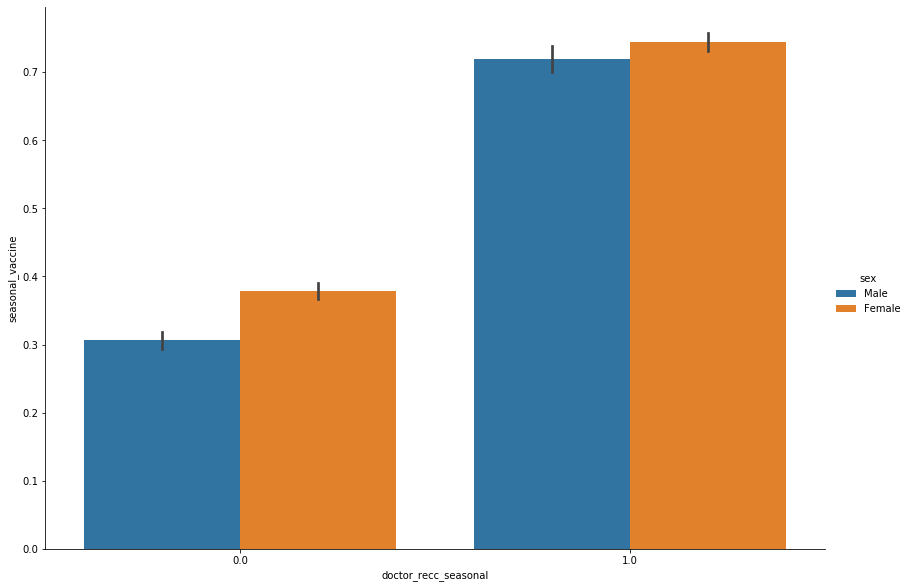

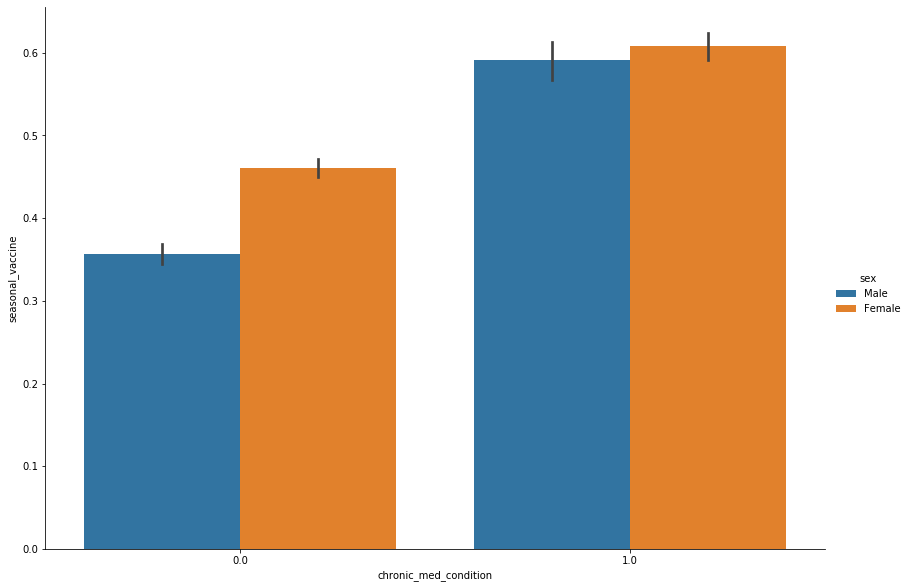

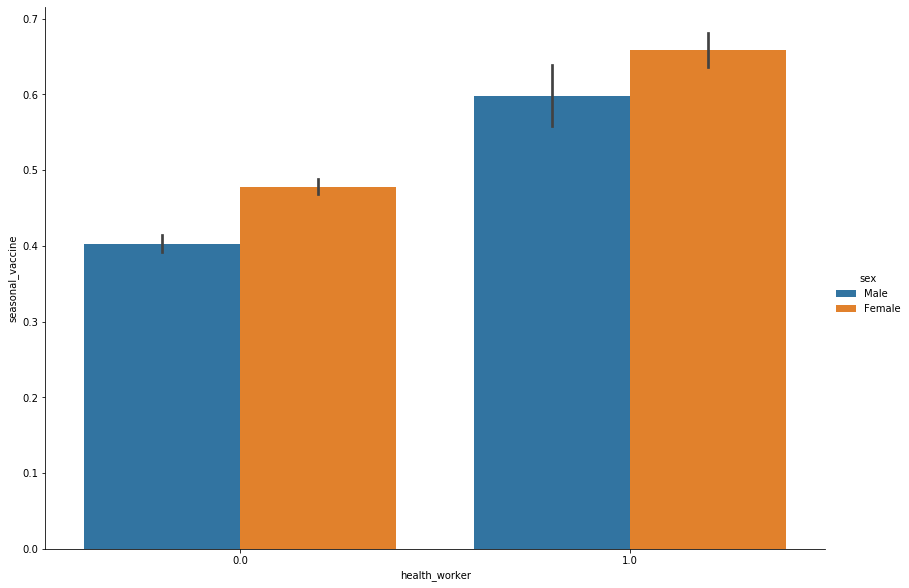

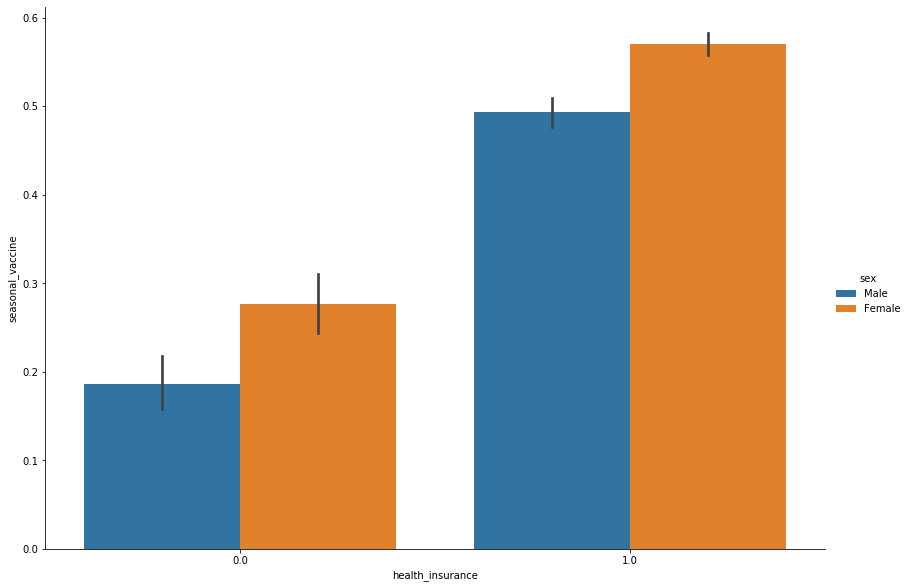

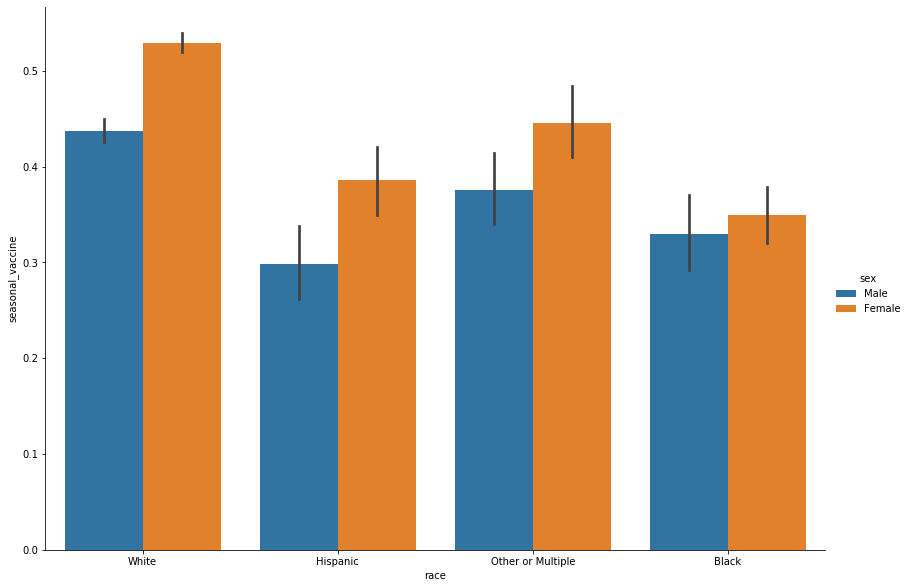

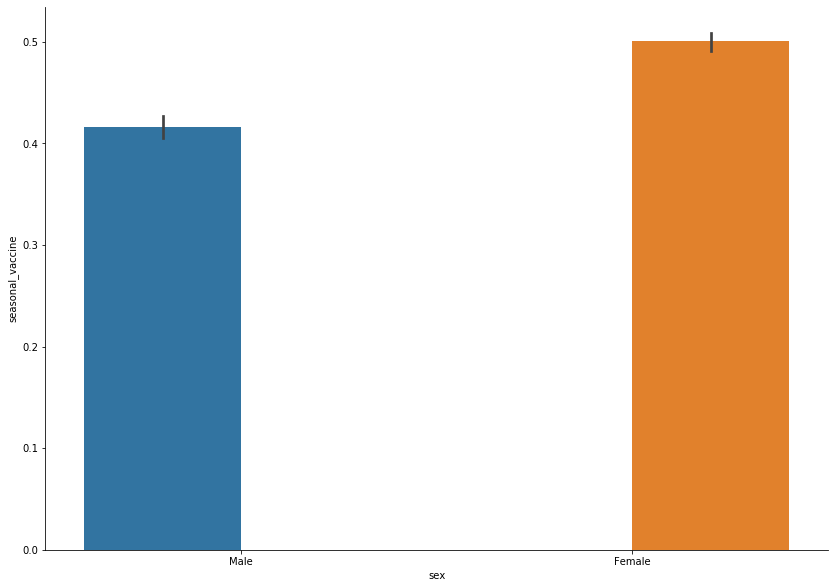

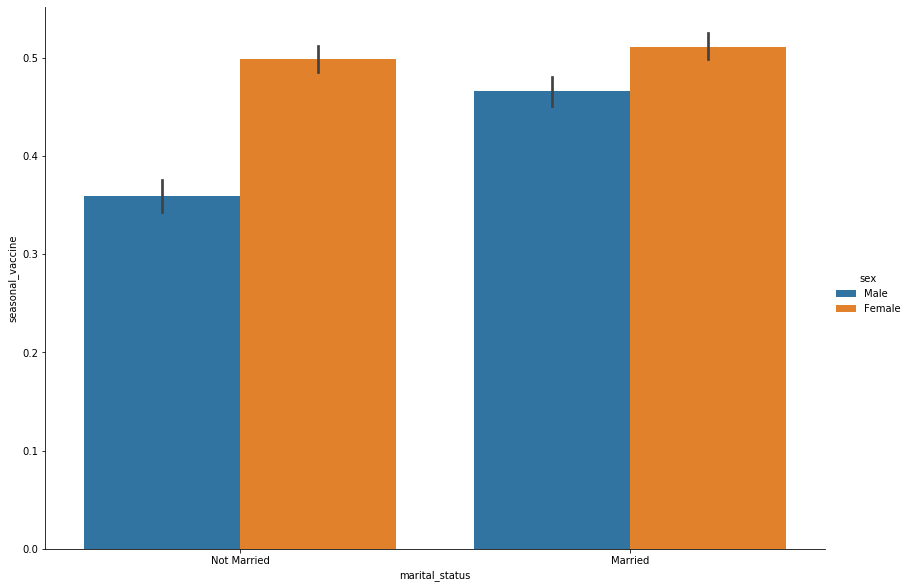

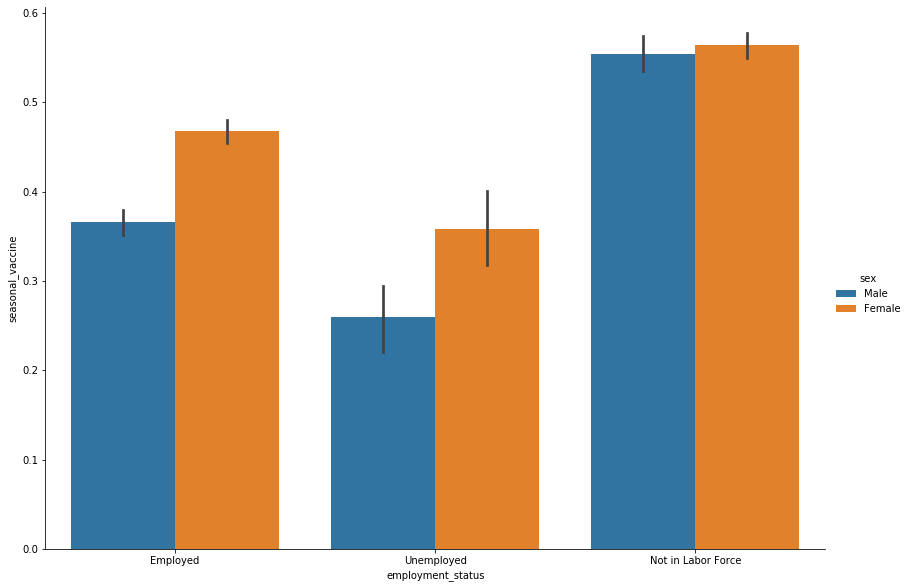

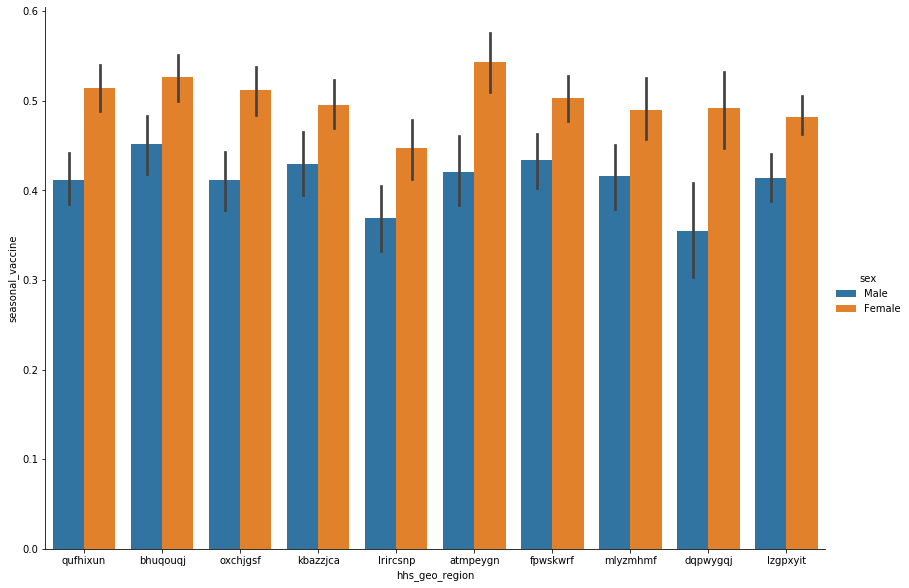

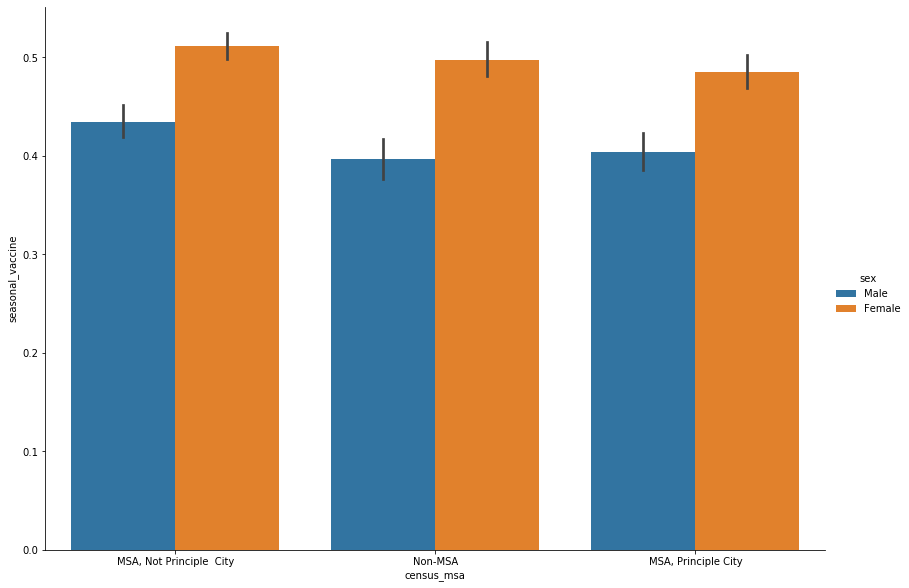

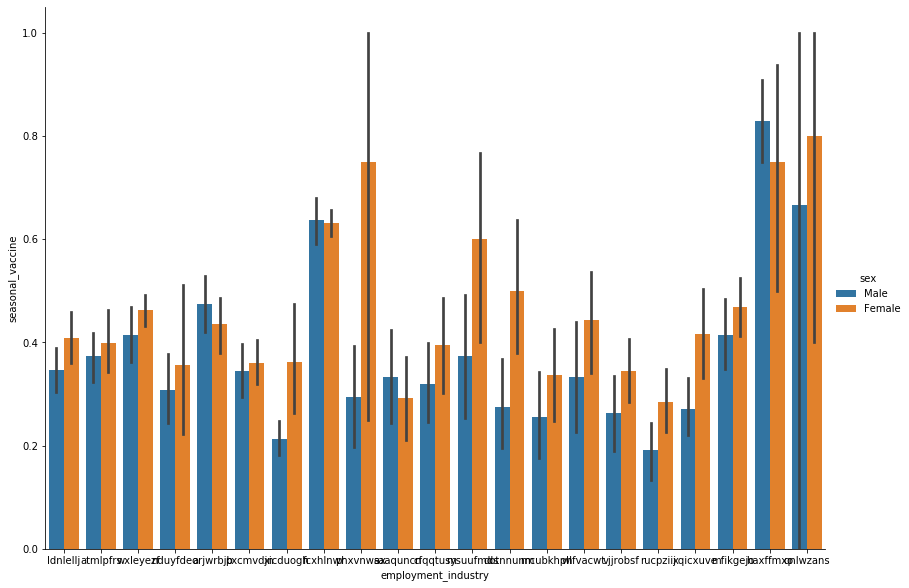

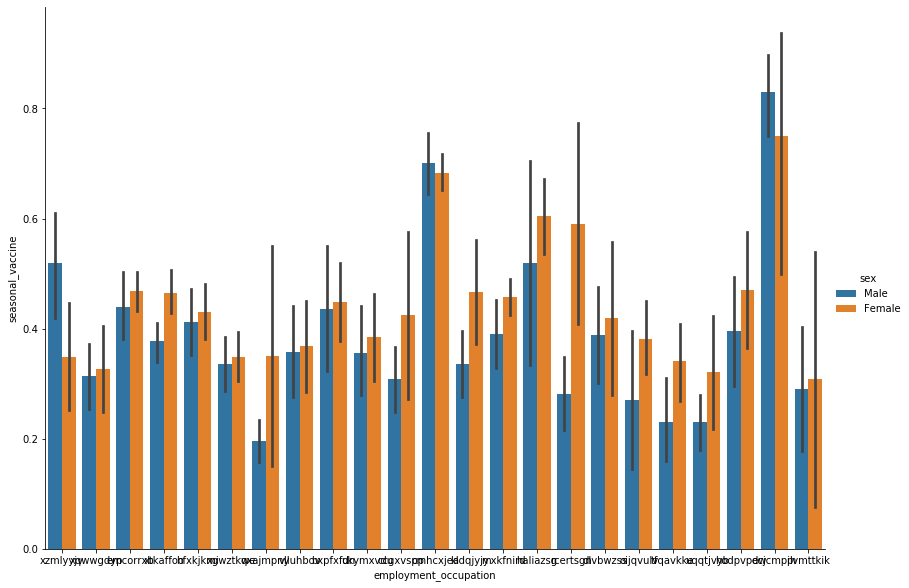

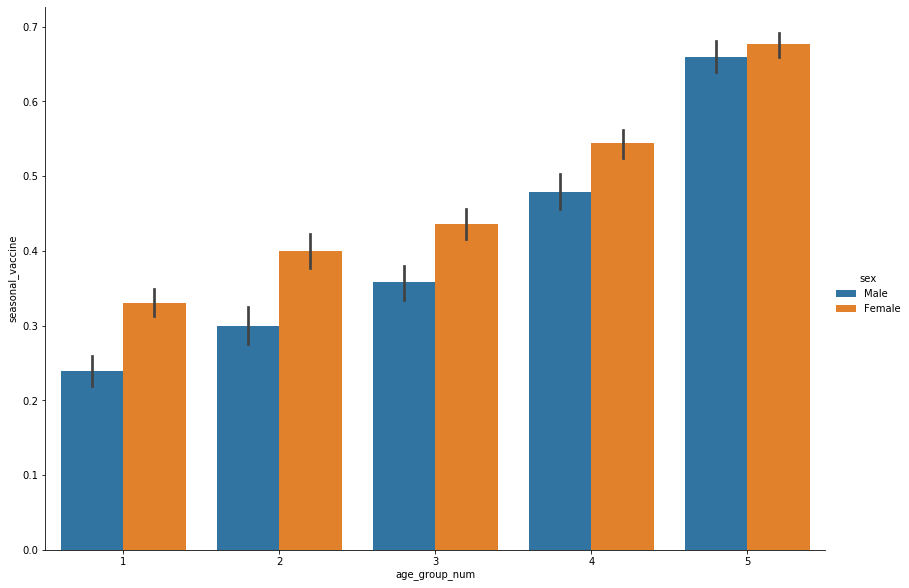

In [19]:
# plot bar graphs for each variable vs target
# test different hues to get sense of variable interactions
# one interaction is between 'sex' and 'marital_status' - married men get more vaccines than unmarried men
# also 'sex' and 'employment status' --> probably due to age

for c in train_to_plot.drop(columns=['seasonal_vaccine']).columns:
    sns.catplot(x=c, y="seasonal_vaccine", kind="bar", hue='sex', data=train_to_plot, height=8.27, aspect=11.7/8.27)

In [20]:
# encode categorical columns

X_train_enc = pd.get_dummies(X_train_2, drop_first=True)

In [21]:
# pd.get_dummies put 0s in for the nulls in categorical columns
# good choice to keep rows with nulls but ignore null values

X_train_enc.head(100)

,doctor_recc_seasonal,chronic_med_condition,health_worker,health_insurance,age_group_num,race_Hispanic,race_Other or Multiple,race_White,sex_Male,marital_status_Not Married,employment_status_Not in Labor Force,employment_status_Unemployed,hhs_geo_region_bhuqouqj,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Principle City",census_msa_Non-MSA,employment_industry_atmlpfrs,employment_industry_cfqqtusy,employment_industry_dotnnunm,employment_industry_fcxhlnwr,employment_industry_haxffmxo,employment_industry_ldnlellj,employment_industry_mcubkhph,employment_industry_mfikgejo,employment_industry_msuufmds,employment_industry_nduyfdeo,employment_industry_phxvnwax,employment_industry_pxcmvdjn,employment_industry_qnlwzans,employment_industry_rucpziij,employment_industry_saaquncn,employment_industry_vjjrobsf,employment_industry_wlfvacwt,employment_industry_wxleyezf,employment_industry_xicduogh,employment_industry_xqicxuve,employment_occupation_ccgxvspp,employment_occupation_cmhcxjea,employment_occupation_dcjcmpih,employment_occupation_dlvbwzss,employment_occupation_emcorrxb,employment_occupation_haliazsg,employment_occupation_hfxkjkmi,employment_occupation_hodpvpew,employment_occupation_kldqjyjy,employment_occupation_mxkfnird,employment_occupation_oijqvulv,employment_occupation_pvmttkik,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
16058,0.00000,0.00000,0.00000,nan,4,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
13692,1.00000,1.00000,0.00000,1.00000,3,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
25093,1.00000,0.00000,0.00000,nan,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4607,0.00000,0.00000,0.00000,0.00000,2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
12414,0.00000,0.00000,0.00000,nan,4,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6325,0.00000,1.00000,0.00000,1.00000,5,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5920,1.00000,0.00000,0.00000,1.00000,5,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11613,0.00000,0.00000,0.00000,1.00000,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
26339,0.00000,0.00000,0.00000,nan,2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16435,1.00000,0.00000,0.00000,1.00000,5,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
# check remaining nulls

print('Null Counts:')
print(X_train_enc.isna().sum()[:4], '\n')

# check value counts on 4 columns with nulls

for c in X_train_enc[['doctor_recc_seasonal','chronic_med_condition','health_worker','health_insurance']].columns:
    print(X_train_enc[c].value_counts())

# one option is to use the median --> impute 0 for the first three columns, 1 for the last
# but may make more sense to use a dummy value, to capture the fact that this data is missing
# another option may be to delete these rows - explore below

Null Counts:
doctor_recc_seasonal     1616
chronic_med_condition     710
health_worker             584
health_insurance         9190
dtype: int64 

0.00000    12304
1.00000     6110
Name: doctor_recc_seasonal, dtype: int64
0.00000    13852
1.00000     5468
Name: chronic_med_condition, dtype: int64
0.00000    17211
1.00000     2235
Name: health_worker, dtype: int64
1.00000    9537
0.00000    1303
Name: health_insurance, dtype: int64


In [23]:
# Lindsey answers:
# how to fill nulls in a binary column (health insurance?)
# can fill with a 1, and then make a "was null" indicator column
# can fill with a 0.85, sort of a nonsense value but would be ok, or something like 0.5

# for interactions - can make a new binary column with 1 where both are true
# but a decision tree will deal with interactions all by itself!

# look at practice notebook from week 22
# shows steps of building a simple model, testing models, iterating, choosing a model
# try to do 3 model types

# include all detail on "why did I make that decision?"  "why did I do that next step?"
# especially: why did you decide to use this model?

In [24]:
# cannot delete rows with missing health_insurance, since about 50%
# check for overlaps in nulls in other 3 rows, may be possible to delete these rows

X_train_delete_nulls = X_train_enc.loc[(X_train_enc['doctor_recc_seasonal'].notnull()
                                      & X_train_enc['chronic_med_condition'].notnull()
                                      & X_train_enc['health_worker'].notnull())]
X_train_delete_nulls

# if we delete all nulls in all 3 columns, we lose 2295 rows, 11% of data

print('If I deleted rows with nulls in doctor_recc_seasonal, chronic_med_condition, health_worker:')
print('Number of rows deleted:', len(X_train_enc) - len(X_train_delete_nulls))
print('Per cent of rows deleted:', round(((len(X_train_enc) - len(X_train_delete_nulls))/len(X_train_enc)*100),2))

# my instinct is to impute a dummy value, but could also test a model with these rows deleted

If I deleted rows with nulls in doctor_recc_seasonal, chronic_med_condition, health_worker:
Number of rows deleted: 2229
Per cent of rows deleted: 11.13


In [25]:
# fill nulls with dummy value (0.5)
X_train_filled = pd.DataFrame.fillna(X_train_enc, 0.5)

# also tested filling with the mean probability
# this improved model performance slightly on the training set, but reduced it slightly on the test set

In [26]:
# run X_test thru same steps

# make age_group numeric
X_test['age_group_num'] = X_test['age_group'].apply(lambda x:1 if (x == '18 - 34 Years')
                                                        else 2 if (x == '35 - 44 Years')
                                                        else 3 if (x == '45 - 54 Years')
                                                        else 4 if (x == '55 - 64 Years')
                                                        else 5)
# drop age_group column
X_test_2 = X_test.drop(columns='age_group')
X_test_2

# encode categorical columns
X_test_enc = pd.get_dummies(X_test_2, drop_first=True)

# fill remaining nulls with dummy value 0.5
X_test_filled = pd.DataFrame.fillna(X_test_enc, 0.5)

X_test_filled.head(100)
X_test_filled.describe()

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,doctor_recc_seasonal,chronic_med_condition,health_worker,health_insurance,age_group_num,race_Hispanic,race_Other or Multiple,race_White,sex_Male,marital_status_Not Married,employment_status_Not in Labor Force,employment_status_Unemployed,hhs_geo_region_bhuqouqj,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Principle City",census_msa_Non-MSA,employment_industry_atmlpfrs,employment_industry_cfqqtusy,employment_industry_dotnnunm,employment_industry_fcxhlnwr,employment_industry_haxffmxo,employment_industry_ldnlellj,employment_industry_mcubkhph,employment_industry_mfikgejo,employment_industry_msuufmds,employment_industry_nduyfdeo,employment_industry_phxvnwax,employment_industry_pxcmvdjn,employment_industry_qnlwzans,employment_industry_rucpziij,employment_industry_saaquncn,employment_industry_vjjrobsf,employment_industry_wlfvacwt,employment_industry_wxleyezf,employment_industry_xicduogh,employment_industry_xqicxuve,employment_occupation_ccgxvspp,employment_occupation_cmhcxjea,employment_occupation_dcjcmpih,employment_occupation_dlvbwzss,employment_occupation_emcorrxb,employment_occupation_haliazsg,employment_occupation_hfxkjkmi,employment_occupation_hodpvpew,employment_occupation_kldqjyjy,employment_occupation_mxkfnird,employment_occupation_oijqvulv,employment_occupation_pvmttkik,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
count,6677.00000,6677.00000,6677.00000,6677.00000,6677.00000,6677.00000,6677.00000,6677.00000,6677.00000,6677.00000,6677.00000,6677.00000,6677.00000,6677.00000,6677.00000,6677.00000,6677.00000,6677.00000,6677.00000,6677.00000,6677.00000,6677.00000,6677.00000,6677.00000,6677.00000,6677.00000,6677.00000,6677.00000,6677.00000,6677.00000,6677.00000,6677.00000,6677.00000,6677.00000,6677.00000,6677.00000,6677.00000,6677.00000,6677.00000,6677.00000,6677.00000,6677.00000,6677.00000,6677.00000,6677.00000,6677.00000,6677.00000,6677.00000,6677.00000,6677.00000,6677.00000,6677.00000,6677.00000,6677.00000,6677.00000,6677.00000,6677.00000,6677.00000,6677.00000,6677.00000,6677.00000,6677.00000,6677.00000,6677.00000,6677.00000
mean,0.33788,0.29242,0.11592,0.70421,3.20264,0.06829,0.06036,0.79437,0.40542,0.43058,0.38805,0.05407,0.10454,0.03939,0.12356,0.10544,0.07863,0.16310,0.08282,0.11188,0.11397,0.29444,0.27782,0.03549,0.01168,0.00839,0.08387,0.00659,0.04718,0.01078,0.02097,0.00404,0.01033,0.00359,0.03699,0.00075,0.02157,0.01348,0.02007,0.00779,0.06799,0.03040,0.01947,0.01303,0.04238,0.00659,0.00869,0.04733,0.00929,0.02726,0.00629,0.01932,0.05526,0.01138,0.00344,0.01947,0.01093,0.01662,0.01573,0.01692,0.01303,0.03804,0.01857,0.06934,0.00973
std,0.45097,0.44404,0.30702,0.30470,1.46053,0.25227,0.23816,0.40419,0.49101,0.49519,0.48734,0.22617,0.30598,0.19453,0.32910,0.30714,0.26918,0.36948,0.27563,0.31524,0.31780,0.45583,0.44796,0.18504,0.10746,0.09120,0.27721,0.08092,0.21203,0.10329,0.14329,0.06347,0.10114,0.05985,0.18876,0.02736,0.14527,0.11532,0.14025,0.08791,0.25176,0.17171,0.13818,0.11341,0.20148,0.08092,0.09280,0.21235,0.09592,0.16285,0.07907,0.13766,0.22851,0.10609,0.05859,0.13818,0.10400,0.12787,0.12442,0.12900,0.11341,0.19131,0.13502,0.25405,0.09819
min,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0

In [27]:
len(X_test)

6677

In [28]:
# fit a model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
logreg.fit(X_train_filled, y_train)

#predict
y_train_pred = logreg.predict(X_train_filled)
y_test_pred = logreg.predict(X_test_filled)

# print scores
print('ROC Scores')
print('Train:', roc_auc_score(y_train, logreg.decision_function(X_train_filled)))
print('Test:', roc_auc_score(y_test, logreg.decision_function(X_test_filled)))
print('\n')
print('Accuracy Scores')
print('Train:', accuracy_score(y_train, y_train_pred))
print('Test:', accuracy_score(y_test, y_test_pred))
print('\n')
print('F1 Scores')
print('Train:', f1_score(y_train, y_train_pred))
print('Test:', f1_score(y_test, y_test_pred))

# not bad for a first pass, but let's improve it
# not overfit

ROC Scores
Train: 0.7550656927872778
Test: 0.7611852155798244


Accuracy Scores
Train: 0.692461308037943
Test: 0.6961210124307323


F1 Scores
Train: 0.6599315446615878
Test: 0.6621149042464612


In [29]:
# just checking to make sure I get the same thing

print(roc_auc_score(y_train, (logreg.predict_proba(X_train_filled))[:,1]))
print(roc_auc_score(y_test, logreg.predict_proba(X_test_filled)[:,1]))

0.7550656927872778
0.7611852155798244


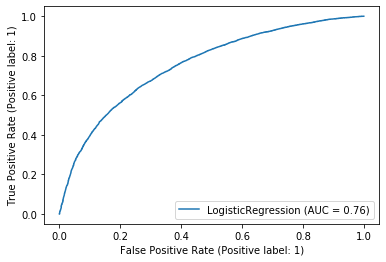

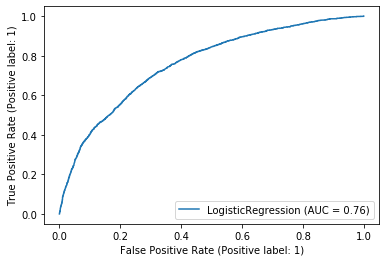

In [30]:
# plot ROC curves

plot_roc_curve(logreg, X_train_filled, y_train)
plot_roc_curve(logreg, X_test_filled, y_test)

In [30]:
# Let's scale it!  # test with min max

# I guess the only thing that wasn't already scaled is the age column
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_filled)
X_test_scaled = scaler.transform(X_test_filled)

In [31]:
# fit scaled model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
logreg.fit(X_train_scaled, y_train)
print(logreg) # Preview model params

y_train_pred = logreg.predict(X_train_filled)
y_test_pred = logreg.predict(X_test_filled)

# print ROC scores
print(roc_auc_score(y_train, logreg.decision_function(X_train_scaled)))
print(roc_auc_score(y_test, logreg.decision_function(X_test_scaled)))


LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')
0.7730423776639395
0.7707717203532202


In [32]:
# maybe I shouldn't have done drop_first=True for columns with nulls
# let's try that again

X_train_2.isna().sum()
# only columns with zero nulls should be drop_first=True
# race, sex, hhs_geo_region, census_msa

doctor_recc_seasonal      1592
chronic_med_condition      721
health_worker              609
health_insurance          9208
race                         0
sex                          0
marital_status            1057
employment_status         1108
hhs_geo_region               0
census_msa                   0
employment_industry       9982
employment_occupation    10104
age_group_num                0
dtype: int64

In [33]:
X_train_enc = pd.get_dummies(X_train_2, drop_first=False)
X_train_enc.columns

Index(['doctor_recc_seasonal', 'chronic_med_condition', 'health_worker',
       'health_insurance', 'age_group_num', 'race_Black', 'race_Hispanic',
       'race_Other or Multiple', 'race_White', 'sex_Female', 'sex_Male',
       'marital_status_Married', 'marital_status_Not Married',
       'employment_status_Employed', 'employment_status_Not in Labor Force',
       'employment_status_Unemployed', 'hhs_geo_region_atmpeygn',
       'hhs_geo_region_bhuqouqj', 'hhs_geo_region_dqpwygqj',
       'hhs_geo_region_fpwskwrf', 'hhs_geo_region_kbazzjca',
       'hhs_geo_region_lrircsnp', 'hhs_geo_region_lzgpxyit',
       'hhs_geo_region_mlyzmhmf', 'hhs_geo_region_oxchjgsf',
       'hhs_geo_region_qufhixun', 'census_msa_MSA, Not Principle  City',
       'census_msa_MSA, Principle City', 'census_msa_Non-MSA',
       'employment_industry_arjwrbjb', 'employment_industry_atmlpfrs',
       'employment_industry_cfqqtusy', 'employment_industry_dotnnunm',
       'employment_industry_fcxhlnwr', 'employment_

In [34]:
X_train_filled = pd.DataFrame.fillna(X_train_enc, 0.5)

In [35]:
# do same steps on X_test
# add preprocessing steps to Pipeline with ColumnTransformer!

X_test_enc = pd.get_dummies(X_test_2, drop_first=False)
X_test_filled = pd.DataFrame.fillna(X_test_enc, 0.5)

In [36]:
def scale_logreg_predict(X_train, y_train, X_test):
    
    # make scaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # make logistic regression
    logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
    logreg.fit(X_train_scaled, y_train)

    # print ROC scores
    print(roc_auc_score(y_train, logreg.decision_function(X_train_scaled)))
    print(roc_auc_score(y_test, logreg.decision_function(X_test_scaled)))
    
    return logreg

In [37]:
scale_logreg_predict(X_train_filled, y_train, X_test_filled)

# very very slight improvement over drop_first=True for all

0.7734757797589273
0.7710884263729838


LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [39]:
# then also test encoding columns with nulls instead of using dummy 0.5?
X_train_enc.isna().sum()

doctor_recc_seasonal                    1592
chronic_med_condition                    721
health_worker                            609
health_insurance                        9208
age_group_num                              0
race_Black                                 0
race_Hispanic                              0
race_Other or Multiple                     0
race_White                                 0
sex_Female                                 0
sex_Male                                   0
marital_status_Married                     0
marital_status_Not Married                 0
employment_status_Employed                 0
employment_status_Not in Labor Force       0
employment_status_Unemployed               0
hhs_geo_region_atmpeygn                    0
hhs_geo_region_bhuqouqj                    0
hhs_geo_region_dqpwygqj                    0
hhs_geo_region_fpwskwrf                    0
hhs_geo_region_kbazzjca                    0
hhs_geo_region_lrircsnp                    0
hhs_geo_re

In [ ]:
X_train_filled = pd.DataFrame.fillna(X_train_drop, 'missing')

In [ ]:
X_train_filled.isna().sum() # no nulls
X_train_filled.info() # now these are object columns - can use pd.get_dummies

In [ ]:
X_train_dummies = pd.get_dummies(X_train_filled, drop_first=True)

In [ ]:
X_train_dummies.info()

In [ ]:
# do same steps on X_test

X_test_filled = pd.DataFrame.fillna(X_test_drop, 'missing')
X_test_dummies = pd.get_dummies(X_test_filled, drop_first=True)

In [ ]:
# test this model

scale_logreg_predict(X_train_dummies, y_train, X_test_dummies)

# another slight improvement!

In [ ]:
# add interaction terms

X_train_inter = X_train_dummies
X_train_inter['man_Married'] = X_train_dummies['sex_Male'] * X_train_dummies['marital_status_Married']

In [ ]:
# do same steps on X_test
X_test_inter = X_test_dummies
X_test_inter['man_Married'] = X_test_dummies['sex_Male'] * X_test_dummies['marital_status_Married']

In [ ]:
# test this model

scale_logreg_predict(X_train_inter, y_train, X_test_inter)

# super slight improvement - pretty much exactly the same

In [ ]:
# no overfitting, so adjusting regularization parameters probably won't help
# but let's try

In [ ]:
# make functions for scaling and predict/score

def scale(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

def score(X_train, y_train, X_test, y_test, clf):
    print(roc_auc_score(y_train, clf.decision_function(X_train)))
    print(roc_auc_score(y_test, clf.decision_function(X_test)))


In [ ]:
# test fit_intercept=True

# scale
X_train_scaled, X_test_scaled = scale(X_train_inter, X_test_inter)

# make logistic regression
logreg = LogisticRegression(fit_intercept=True, C=1e12, solver='liblinear')
logreg.fit(X_train_scaled, y_train)

# print ROC scores
score(X_train_scaled, y_train, X_test_scaled, y_test, logreg)

# no change

In [ ]:
# test C

c_list = [10,100,1000]

# make scaler
X_train_scaled, X_test_scaled = scale(X_train_inter, X_test_inter)

# make logreg and score
for c in c_list:
    # make logistic regression
    logreg = LogisticRegression(fit_intercept=False, C=c, solver='liblinear')
    logreg.fit(X_train_scaled, y_train)

    # predict
    y_train_pred = logreg.predict(X_train_scaled)
    y_test_pred = logreg.predict(X_test_scaled)

    # print ROC scores
    print('C =', c)
    score(X_train_scaled, y_train, X_test_scaled, y_test, logreg)
    print('\n')
    
    # no change

In [ ]:
# test solvers

solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

# make scaler
X_train_scaled, X_test_scaled = scale(X_train_inter, X_test_inter)

for s in solvers:
    # make logistic regression
    logreg = LogisticRegression(fit_intercept=False, C=1e12, solver=s)
    logreg.fit(X_train_scaled, y_train)

    # predict
    y_train_pred = logreg.predict(X_train_scaled)
    y_test_pred = logreg.predict(X_test_scaled)

    # print ROC scores
    print('Solver =', s)
    score(X_train_scaled, y_train, X_test_scaled, y_test, logreg)
    print('\n')
    
    # no change

In [ ]:
# use k fold cross validation to make sure you're not overfitting to this test set
# try all combos for other models, use gridsearch

In [ ]:
# get coefficients for best logreg
# every time I run this function, it redefines logreg right?

logreg = scale_logreg_predict(X_train_inter, y_train, X_test_inter)

logreg.coef_

In [ ]:
X_train_inter.columns

In [ ]:
# make a model-less baseline?

y_pred_mean = np.full_like(y_train, fill_value=y_train.mean(), dtype=np.double)
y_pred_mode = np.full_like(y_train, fill_value=y_train.mode(), dtype=np.double)

In [ ]:
roc_auc_score(y_train, y_pred_mean) 
roc_auc_score(y_train, y_pred_mode)

# how do you get a y-score or decision function for this?